# Random Forest model for prediction of avalanche events

In [1]:
# import of standard Python libraries for data analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import needed objects from Scikit learn library for machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from numpy import mean
from sklearn.model_selection import RepeatedStratifiedKFold

In [3]:
# I would like to see all rows and columns of dataframes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Reading dataset and final preprocessing

In [4]:
# reading dataset
df = pd.read_csv("final_data.csv")

In [5]:
df.head()

,elevation,massif_num,lon,lat,temp_soil_0.005_m,temp_soil_0.08_m,liquid_water_in_soil,frozen_water_in_soil,risk_index,aval_type,whiteness_albedo,net_radiation,drainage,runoff,snow_melting_rate,rainfall_rate,surface_temperature,surface_snow_amount,thickness_of_snowfall,snow_thickness_1D,snow_thickness_3D,snow_thickness_5D,snow_thickness_7D,snow_water_1D,snow_water_3D,snow_water_5D,snow_water_7D,penetration_ram_resistance,thickness_of_wet_snow_top_of_snowpack,thickness_of_frozen_snow_top_of_snowpack,acccidental_risk_index,day,surface_air_pressure_mean,near_surface_humidity_mean,relative_humidity_mean,freezing_level_altitude_mean,rain_snow_transition_altitude_mean,air_temp_max,wind_speed_max,snowfall_rate_max,nebulosity_max,air_temp_min,massif_name,aval_accident,aval_event
0,1500.0,1,6.64493,46.17685,277.709158,279.014864,0.323705,0.0,6.0,6.0,0.2,3.251180,0.000018,0.000019,0.0,0.000096,277.709158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2010-10-01,84550.445,0.005956,80.023400,2268.572667,422.333333,283.38647,4.92501,0.0,0.988523,277.14102,Chablais,0,0
1,1500.0,1,6.64493,46.17685,279.496314,280.143477,0.310928,0.0,6.0,6.0,0.2,79.345799,0.000018,0.000000,0.0,0.000000,279.496314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2010-10-02,84550.445,0.006067,58.228333,1080.672643,40.151042,288.89374,4.92201,0.0,0.758338,281.01437,Chablais,0,0
2,1500.0,1,6.64493,46.17685,278.575394,280.282568,0.305990,0.0,6.0,6.0,0.2,44.215499,0.000018,0.000000,0.0,0.000000,278.575394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2010-10-03,84550.445,0.006655,61.123905,1194.040409,11.500000,290.59950,3.32201,0.0,0.627164,282.84122,Chablais,0,0
3,1500.0,1,6.64493,46.17685,280.511023,281.446828,0.301774,0.0,6.0,6.0,0.2,73.435071,0.000018,0.000000,0.0,0.000000,280.511023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2010-10-04,84550.445,0.005970,58.574722,1937.796566,718.493056,291.77880,5.22301,0.0,0.996815,281.35240,Chablais,0,0
4,1500.0,1,6.64493,46.17685,280.790508,281.635283,0.319800,0.0,6.0,6.0,0.2,17.299822,0.000018,0.000008,0.0,0.000047,280.790508,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2010-10-05,84550.445,0.007777,94.231740,1837.712598,515.784722,284.17500,4.12301,0.0,0.982423,280.60666,Chablais,0,0


In [6]:
# viewing all variables to decide which are not useful
df.columns

Index(['elevation', 'massif_num', 'lon', 'lat', 'temp_soil_0.005_m',
       'temp_soil_0.08_m', 'liquid_water_in_soil', 'frozen_water_in_soil',
       'risk_index', 'aval_type', 'whiteness_albedo', 'net_radiation',
       'drainage', 'runoff', 'snow_melting_rate', 'rainfall_rate',
       'surface_temperature', 'surface_snow_amount', 'thickness_of_snowfall',
       'snow_thickness_1D', 'snow_thickness_3D', 'snow_thickness_5D',
       'snow_thickness_7D', 'snow_water_1D', 'snow_water_3D', 'snow_water_5D',
       'snow_water_7D', 'penetration_ram_resistance',
       'thickness_of_wet_snow_top_of_snowpack',
       'thickness_of_frozen_snow_top_of_snowpack', 'acccidental_risk_index',
       'day', 'surface_air_pressure_mean', 'near_surface_humidity_mean',
       'relative_humidity_mean', 'freezing_level_altitude_mean',
       'rain_snow_transition_altitude_mean', 'air_temp_max', 'wind_speed_max',
       'snowfall_rate_max', 'nebulosity_max', 'air_temp_min', 'massif_name',
       'aval_accid

In [7]:
# removing variables not needed for random forest model
df_clean = df.drop(columns=["massif_num","lon","lat","aval_type", "acccidental_risk_index", 
                            'snow_thickness_1D', 'snow_thickness_3D', 'snow_thickness_5D',
                           'snow_water_1D', 'snow_water_3D', 'snow_water_5D', 'risk_index',
                           'thickness_of_wet_snow_top_of_snowpack','thickness_of_frozen_snow_top_of_snowpack',
                           'surface_air_pressure_mean', 'rainfall_rate', 'drainage', 'runoff',
                           'liquid_water_in_soil', 'frozen_water_in_soil', 'elevation','snow_melting_rate', 'aval_accident'])

In [8]:
# viewing if data type of the variables is suitable for Random Forest
# there are 2 string categorical variables that needs to be transformed: day and massif name
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540818 entries, 0 to 540817
Data columns (total 22 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   temp_soil_0.005_m                   540818 non-null  float64
 1   temp_soil_0.08_m                    540818 non-null  float64
 2   whiteness_albedo                    540818 non-null  float64
 3   net_radiation                       540818 non-null  float64
 4   surface_temperature                 540818 non-null  float64
 5   surface_snow_amount                 540818 non-null  float64
 6   thickness_of_snowfall               540818 non-null  float64
 7   snow_thickness_7D                   540818 non-null  float64
 8   snow_water_7D                       540818 non-null  float64
 9   penetration_ram_resistance          540818 non-null  float64
 10  day                                 540818 non-null  object 
 11  near_surface_humidity_mean

In [9]:
df_clean.shape

(540818, 22)

In [10]:
# for transformation of massif names I will use OneHotEncoding with pd.get_dummies method
# selecting of values for dummies
df_clean.massif_name.unique()

array(['Chablais', 'Aravis', 'Mont-Blanc', 'Bauges', 'Beaufortin',
       'Hte-tarent', 'Chartreuse', 'Belledonne', 'Maurienne', 'Vanoise',
       'Hte-maurie', 'Gdes-rouss', 'Thabor', 'Vercors', 'Oisans',
       'Pelvoux', 'Queyras', 'Devoluy', 'Champsaur', 'Parpaillon',
       'Ubaye', 'Ht_Var-Ver', 'Mercantour'], dtype=object)

In [11]:
massifs = ('Chablais', 'Aravis', 'Mont-Blanc', 'Bauges', 'Beaufortin',
       'Hte-tarent', 'Chartreuse', 'Belledonne', 'Maurienne', 'Vanoise',
       'Hte-maurie', 'Gdes-rouss', 'Thabor', 'Vercors', 'Oisans',
       'Pelvoux', 'Queyras', 'Devoluy', 'Champsaur', 'Parpaillon',
       'Ubaye', 'Ht_Var-Ver', 'Mercantour')

In [12]:
# creating initial dataframe
df_massifs = pd.DataFrame(massifs, columns=['massif_name'])

# generate binary values using get_dummies
dum_df = pd.get_dummies(df_massifs, columns=["massif_name"], prefix="massif")

# merge initial dataframe with dummies
df_massifs = df_massifs.join(dum_df)

# merge final datatset with dataframe with dummies
df_clean = df_clean.merge(df_massifs, how="left", on="massif_name")

In [13]:
# checking dataset with dummy variables
df_clean.head()

,temp_soil_0.005_m,temp_soil_0.08_m,whiteness_albedo,net_radiation,surface_temperature,surface_snow_amount,thickness_of_snowfall,snow_thickness_7D,snow_water_7D,penetration_ram_resistance,day,near_surface_humidity_mean,relative_humidity_mean,freezing_level_altitude_mean,rain_snow_transition_altitude_mean,air_temp_max,wind_speed_max,snowfall_rate_max,nebulosity_max,air_temp_min,massif_name,aval_event,massif_Aravis,massif_Bauges,massif_Beaufortin,massif_Belledonne,massif_Chablais,massif_Champsaur,massif_Chartreuse,massif_Devoluy,massif_Gdes-rouss,massif_Ht_Var-Ver,massif_Hte-maurie,massif_Hte-tarent,massif_Maurienne,massif_Mercantour,massif_Mont-Blanc,massif_Oisans,massif_Parpaillon,massif_Pelvoux,massif_Queyras,massif_Thabor,massif_Ubaye,massif_Vanoise,massif_Vercors
0,277.709158,279.014864,0.2,3.251180,277.709158,0.0,0.0,0.0,0.0,0.0,2010-10-01,0.005956,80.023400,2268.572667,422.333333,283.38647,4.92501,0.0,0.988523,277.14102,Chablais,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,279.496314,280.143477,0.2,79.345799,279.496314,0.0,0.0,0.0,0.0,0.0,2010-10-02,0.006067,58.228333,1080.672643,40.151042,288.89374,4.92201,0.0,0.758338,281.01437,Chablais,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,278.575394,280.282568,0.2,44.215499,278.575394,0.0,0.0,0.0,0.0,0.0,2010-10-03,0.006655,61.123905,1194.040409,11.500000,290.59950,3.32201,0.0,0.627164,282.84122,Chablais,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,280.511023,281.446828,0.2,73.435071,280.511023,0.0,0.0,0.0,0.0,0.0,2010-10-04,0.005970,58.574722,1937.796566,718.493056,291.77880,5.22301,0.0,0.996815,281.35240,Chablais,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,280.790508,281.635283,0.2,17.299822,280.790508,0.0,0.0,0.0,0.0,0.0,2010-10-05,0.007777,94.231740,1837.712598,515.784722,284.17500,4.12301,0.0,0.982423,280.60666,Chablais,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
# getting rid of redundant variable
df_clean = df_clean.drop(columns=['massif_name'])

In [15]:
# second categorical variable to transform is day
# slicing is used to get years and months from day variable
# and after we need to transform years and months to integers
df_clean["year"] = (df_clean.day.str[:4]).astype(int)
df_clean["month"] = (df_clean.day.str[5:7]).astype(int)
df_clean.head()

,temp_soil_0.005_m,temp_soil_0.08_m,whiteness_albedo,net_radiation,surface_temperature,surface_snow_amount,thickness_of_snowfall,snow_thickness_7D,snow_water_7D,penetration_ram_resistance,day,near_surface_humidity_mean,relative_humidity_mean,freezing_level_altitude_mean,rain_snow_transition_altitude_mean,air_temp_max,wind_speed_max,snowfall_rate_max,nebulosity_max,air_temp_min,aval_event,massif_Aravis,massif_Bauges,massif_Beaufortin,massif_Belledonne,massif_Chablais,massif_Champsaur,massif_Chartreuse,massif_Devoluy,massif_Gdes-rouss,massif_Ht_Var-Ver,massif_Hte-maurie,massif_Hte-tarent,massif_Maurienne,massif_Mercantour,massif_Mont-Blanc,massif_Oisans,massif_Parpaillon,massif_Pelvoux,massif_Queyras,massif_Thabor,massif_Ubaye,massif_Vanoise,massif_Vercors,year,month
0,277.709158,279.014864,0.2,3.251180,277.709158,0.0,0.0,0.0,0.0,0.0,2010-10-01,0.005956,80.023400,2268.572667,422.333333,283.38647,4.92501,0.0,0.988523,277.14102,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2010,10
1,279.496314,280.143477,0.2,79.345799,279.496314,0.0,0.0,0.0,0.0,0.0,2010-10-02,0.006067,58.228333,1080.672643,40.151042,288.89374,4.92201,0.0,0.758338,281.01437,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2010,10
2,278.575394,280.282568,0.2,44.215499,278.575394,0.0,0.0,0.0,0.0,0.0,2010-10-03,0.006655,61.123905,1194.040409,11.500000,290.59950,3.32201,0.0,0.627164,282.84122,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2010,10
3,280.511023,281.446828,0.2,73.435071,280.511023,0.0,0.0,0.0,0.0,0.0,2010-10-04,0.005970,58.574722,1937.796566,718.493056,291.77880,5.22301,0.0,0.996815,281.35240,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2010,10
4,280.790508,281.635283,0.2,17.299822,280.790508,0.0,0.0,0.0,0.0,0.0,2010-10-05,0.007777,94.231740,1837.712598,515.784722,284.17500,4.12301,0.0,0.982423,280.60666,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2010,10


In [16]:
# getting rid of redundant variable
df_clean = df_clean.drop(columns=['day', 'year'])

In [17]:
# checking dataset with new time variables
df_clean.head()

,temp_soil_0.005_m,temp_soil_0.08_m,whiteness_albedo,net_radiation,surface_temperature,surface_snow_amount,thickness_of_snowfall,snow_thickness_7D,snow_water_7D,penetration_ram_resistance,near_surface_humidity_mean,relative_humidity_mean,freezing_level_altitude_mean,rain_snow_transition_altitude_mean,air_temp_max,wind_speed_max,snowfall_rate_max,nebulosity_max,air_temp_min,aval_event,massif_Aravis,massif_Bauges,massif_Beaufortin,massif_Belledonne,massif_Chablais,massif_Champsaur,massif_Chartreuse,massif_Devoluy,massif_Gdes-rouss,massif_Ht_Var-Ver,massif_Hte-maurie,massif_Hte-tarent,massif_Maurienne,massif_Mercantour,massif_Mont-Blanc,massif_Oisans,massif_Parpaillon,massif_Pelvoux,massif_Queyras,massif_Thabor,massif_Ubaye,massif_Vanoise,massif_Vercors,month
0,277.709158,279.014864,0.2,3.251180,277.709158,0.0,0.0,0.0,0.0,0.0,0.005956,80.023400,2268.572667,422.333333,283.38647,4.92501,0.0,0.988523,277.14102,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
1,279.496314,280.143477,0.2,79.345799,279.496314,0.0,0.0,0.0,0.0,0.0,0.006067,58.228333,1080.672643,40.151042,288.89374,4.92201,0.0,0.758338,281.01437,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
2,278.575394,280.282568,0.2,44.215499,278.575394,0.0,0.0,0.0,0.0,0.0,0.006655,61.123905,1194.040409,11.500000,290.59950,3.32201,0.0,0.627164,282.84122,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
3,280.511023,281.446828,0.2,73.435071,280.511023,0.0,0.0,0.0,0.0,0.0,0.005970,58.574722,1937.796566,718.493056,291.77880,5.22301,0.0,0.996815,281.35240,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
4,280.790508,281.635283,0.2,17.299822,280.790508,0.0,0.0,0.0,0.0,0.0,0.007777,94.231740,1837.712598,515.784722,284.17500,4.12301,0.0,0.982423,280.60666,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10


In [18]:
# verifying there are no null values in dataset
(df_clean.apply(lambda x: x.isnull().sum())).sum()

0

In [19]:
# checking one last time my dataset before creating RF models
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540818 entries, 0 to 540817
Data columns (total 44 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   temp_soil_0.005_m                   540818 non-null  float64
 1   temp_soil_0.08_m                    540818 non-null  float64
 2   whiteness_albedo                    540818 non-null  float64
 3   net_radiation                       540818 non-null  float64
 4   surface_temperature                 540818 non-null  float64
 5   surface_snow_amount                 540818 non-null  float64
 6   thickness_of_snowfall               540818 non-null  float64
 7   snow_thickness_7D                   540818 non-null  float64
 8   snow_water_7D                       540818 non-null  float64
 9   penetration_ram_resistance          540818 non-null  float64
 10  near_surface_humidity_mean          540818 non-null  float64
 11  relative_humidity_mean    

## Problem with very imbalanced dataset
- metrics like Accuracy will be very high, but that does not provide any significant insight, because of imbalanced dataset with majority of No avalanche events
- in classification report metrics **Precision will have lesser importance for my analysis than Recall**, because I want to reduce number of False Negatives rather then number of False Positives
- **For performance of RF model, I will look mainly on weighted F1-score** metrics because it is the most suitable for this kind of analysis. F1-score is in fact weighted average of the precision and recall.

In [20]:
# Percentage of cases with and without avalanches showing imbalanced dataset
round((df_clean.aval_event.value_counts()/540818)*100, 2)

0    99.62
1     0.38
Name: aval_event, dtype: float64

In [21]:
# labels are the values we want to predict
labels_ev = np.array(df_clean['aval_event'])

# removing the labels from the features
features_ev = df_clean.drop(columns=['aval_event'])

# saving feature names for later use
feature_list_ev = list(features_ev.columns)

# converting to numpy array
features_ev = np.array(features_ev)

In [22]:
# splitting dataset into train and test
train_features_ev, test_features_ev, train_labels_ev, test_labels_ev = train_test_split(features_ev, labels_ev, test_size = 0.33, random_state = 42)

In [23]:
# displaying sizes of train/test features and labels
print('Training Features Shape:', train_features_ev.shape)
print('Training Labels Shape:', train_labels_ev.shape)
print('Testing Features Shape:', test_features_ev.shape)
print('Testing Labels Shape:', test_labels_ev.shape)

Training Features Shape: (362348, 43)
Training Labels Shape: (362348,)
Testing Features Shape: (178470, 43)
Testing Labels Shape: (178470,)


In [24]:
%%time
# defining model
rfc_basic=RandomForestClassifier(n_estimators=100, class_weight='balanced_subsample')

# defining evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluating model
scores = cross_val_score(rfc_basic, features_ev, labels_ev, scoring='roc_auc', cv=cv, n_jobs=-1)

Wall time: 28min 55s


In [25]:
%%time

# fitting model and prediction
rfc_basic.fit(train_features_ev,train_labels_ev)

label_pred_ev = rfc_basic.predict(test_features_ev)

Wall time: 2min 57s


In [26]:
# summary of performance
print('Mean ROC AUC: %.5f' % mean(scores))
print("Accuracy:",round(metrics.accuracy_score(test_labels_ev, label_pred_ev),5))
print("F1_score weighted:", round(f1_score(test_labels_ev, label_pred_ev, average='weighted'),5))

Mean ROC AUC: 0.99462
Accuracy: 0.9982
F1_score weighted: 0.99793


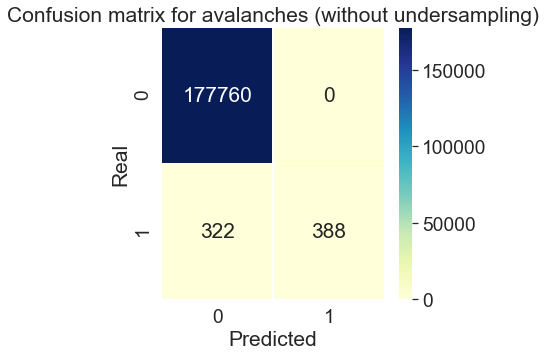

In [27]:
# displaying confusion matrix
sns.set(font_scale=1.75)
f, ax = plt.subplots(figsize=(5, 5))
cf_matrix_basic = confusion_matrix(test_labels_ev, label_pred_ev)
sns.heatmap(cf_matrix_basic, annot=True, ax=ax, cmap="YlGnBu", fmt=".0f", linewidths=.5)
plt.title("Confusion matrix for avalanches (without undersampling)")
plt.xlabel('Predicted')
plt.ylabel('Real');

In [28]:
# displaying report of performance of model
print(classification_report(test_labels_ev, label_pred_ev, digits=3))

              precision    recall  f1-score   support

           0      0.998     1.000     0.999    177760
           1      1.000     0.546     0.707       710

    accuracy                          0.998    178470
   macro avg      0.999     0.773     0.853    178470
weighted avg      0.998     0.998     0.998    178470



### Vanilla Undersampling
- strategy to improve recall and F1 score, especially for cases where avalanche events happened
- class weight balanced subsample is used because in previous iterations of model this class weight had the best performance metrics

In [29]:
# class count for undersampling
count_class_0, count_class_1 = df_clean.aval_event.value_counts()

# dividing by class
df_class_0 = df_clean[df_clean['aval_event'] == 0]
df_class_1 = df_clean[df_clean['aval_event'] == 1]

Random under-sampling:
1    2039
0    2039
Name: aval_event, dtype: int64


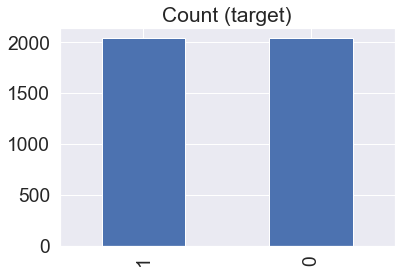

In [30]:
# creating new dataset for undersampling and plotting
df_class_0_under = df_class_0.sample(count_class_1)

df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.aval_event.value_counts())

df_test_under.aval_event.value_counts().plot(kind='bar', title='Count (target)');

In [31]:
# labels are the values we want to predict
labels_under = np.array(df_test_under['aval_event'])

# remove the labels from the features
features_under = df_test_under.drop(columns=['aval_event'])

# saving feature names for later use
feature_list_under = list(features_under.columns)

# convert to numpy array
features_under = np.array(features_under)

In [32]:
# splitting dataset into train and test
train_features_under, test_features_under, train_labels_under, test_labels_under = train_test_split(features_under, labels_under, test_size = 0.33, random_state = 42)

In [33]:
# displaying sizes of train/test features and labels
print('Training Features Shape:', train_features_under.shape)
print('Training Labels Shape:', train_labels_under.shape)
print('Testing Features Shape:', test_features_under.shape)
print('Testing Labels Shape:', test_labels_under.shape)

Training Features Shape: (2732, 43)
Training Labels Shape: (2732,)
Testing Features Shape: (1346, 43)
Testing Labels Shape: (1346,)


In [34]:
%%time
# defining model
rfc_under_sub=RandomForestClassifier(n_estimators=100, class_weight='balanced_subsample')

# defining evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluating model
scores = cross_val_score(rfc_under_sub, features_under, labels_under, scoring='roc_auc', cv=cv, n_jobs=-1)

Wall time: 11.7 s


In [35]:
%%time
#fitting model and prediciton
rfc_under_sub.fit(train_features_under,train_labels_under)

label_pred_under=rfc_under_sub.predict(test_features_under)

Wall time: 820 ms


In [36]:
# summary of performance
print('Mean ROC AUC: %.5f' % mean(scores))
print("Accuracy:",round(metrics.accuracy_score(test_labels_under, label_pred_under),5))
print("F1_score weighted:", round(f1_score(test_labels_under, label_pred_under, average='weighted'),5))

Mean ROC AUC: 0.98117
Accuracy: 0.90193
F1_score weighted: 0.9019


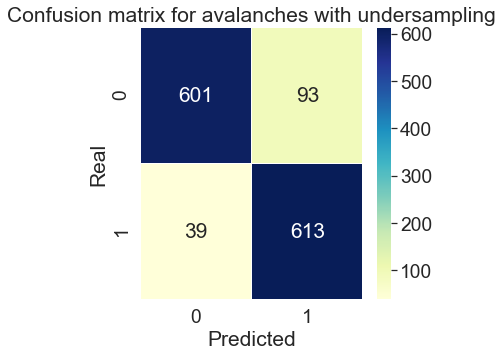

In [37]:
# displaying confusion matrix

cf_matrix_under_1 = confusion_matrix(test_labels_under, label_pred_under)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cf_matrix_under_1, annot=True, ax=ax, cmap="YlGnBu", fmt=".0f", linewidths=.5)
plt.title("Confusion matrix for avalanches with undersampling")
plt.xlabel('Predicted')
plt.ylabel('Real');

In [38]:
# dispplaying report of performance of model
print(classification_report(test_labels_under, label_pred_under, digits=3))

              precision    recall  f1-score   support

           0      0.939     0.866     0.901       694
           1      0.868     0.940     0.903       652

    accuracy                          0.902      1346
   macro avg      0.904     0.903     0.902      1346
weighted avg      0.905     0.902     0.902      1346



## Results with undersampling model on normal sample
- in reality there won't be 50 % of cases with and 50 % without avalanche
- therefore predictive capacity of the my **Random Forest model will be more close to results from normal sample**, even though in reality there are more avalanches than they are being detected so there is more than 0,4 % of avalanches which I have in my dataset

### RF model with undersampling on normal sample

In [39]:
# labels are the values we want to predict
labels_ev = np.array(df_clean['aval_event'])

# removing the labels from the features
features_ev = df_clean.drop(columns=['aval_event'])

# saving feature names for later use
feature_list_ev = list(features_ev.columns)

# converting to numpy array
features_ev = np.array(features_ev)

In [40]:
# splitting dataset into train and test
train_features_ev, test_features_ev, train_labels_ev, test_labels_ev = train_test_split(features_ev, labels_ev, test_size = 0.33, random_state = 42)

In [41]:
# displaying sizes of train/test features and labels
print('Training Features Shape:', train_features_ev.shape)
print('Training Labels Shape:', train_labels_ev.shape)
print('Testing Features Shape:', test_features_ev.shape)
print('Testing Labels Shape:', test_labels_ev.shape)

Training Features Shape: (362348, 43)
Training Labels Shape: (362348,)
Testing Features Shape: (178470, 43)
Testing Labels Shape: (178470,)


In [42]:
%%time
# evaluating model
scores = cross_val_score(rfc_under_sub, features_ev, labels_ev, scoring='roc_auc', cv=cv, n_jobs=-1)

Wall time: 23min 55s


In [43]:
%%time

# fitting model and prediction
rfc_under_sub.fit(train_features_ev,train_labels_ev)

label_pred_ev = rfc_under_sub.predict(test_features_ev)

Wall time: 6min 54s


In [44]:
# summary of performance
print('Mean ROC AUC: %.5f' % mean(scores))
print("Accuracy:",round(metrics.accuracy_score(test_labels_ev, label_pred_ev),5))
print("F1_score weighted:", round(f1_score(test_labels_ev, label_pred_ev, average='weighted'),5))

Mean ROC AUC: 0.99388
Accuracy: 0.9982
F1_score weighted: 0.99794


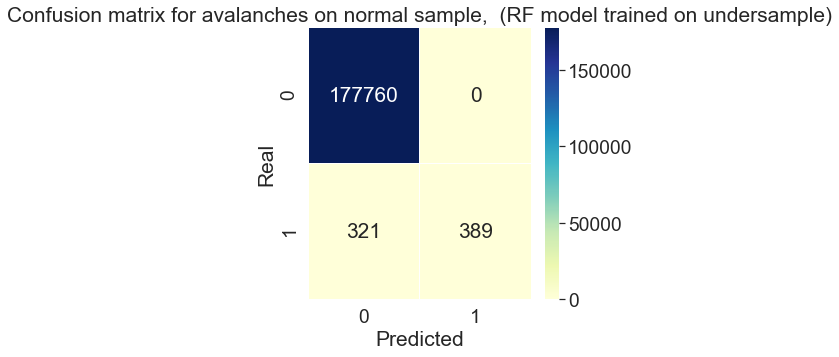

In [45]:
# displaying confusion matrix
f, ax = plt.subplots(figsize=(5, 5))
cf_matrix_2 = confusion_matrix(test_labels_ev, label_pred_ev)
sns.heatmap(cf_matrix_2, annot=True, ax=ax, cmap="YlGnBu", fmt=".0f", linewidths=.5)
plt.title("Confusion matrix for avalanches on normal sample,  (RF model trained on undersample)")
plt.xlabel('Predicted')
plt.ylabel('Real');

In [46]:
# displaying report of performance of model
print(classification_report(test_labels_ev, label_pred_ev, digits=3))

              precision    recall  f1-score   support

           0      0.998     1.000     0.999    177760
           1      1.000     0.548     0.708       710

    accuracy                          0.998    178470
   macro avg      0.999     0.774     0.854    178470
weighted avg      0.998     0.998     0.998    178470



## Results without summer months

In [47]:
# creating dataframe without summer months
summer_season = [6, 7, 8]
df_winter = df_clean[~df_clean["month"].isin(summer_season)]

In [48]:
df_winter.head()

,temp_soil_0.005_m,temp_soil_0.08_m,whiteness_albedo,net_radiation,surface_temperature,surface_snow_amount,thickness_of_snowfall,snow_thickness_7D,snow_water_7D,penetration_ram_resistance,near_surface_humidity_mean,relative_humidity_mean,freezing_level_altitude_mean,rain_snow_transition_altitude_mean,air_temp_max,wind_speed_max,snowfall_rate_max,nebulosity_max,air_temp_min,aval_event,massif_Aravis,massif_Bauges,massif_Beaufortin,massif_Belledonne,massif_Chablais,massif_Champsaur,massif_Chartreuse,massif_Devoluy,massif_Gdes-rouss,massif_Ht_Var-Ver,massif_Hte-maurie,massif_Hte-tarent,massif_Maurienne,massif_Mercantour,massif_Mont-Blanc,massif_Oisans,massif_Parpaillon,massif_Pelvoux,massif_Queyras,massif_Thabor,massif_Ubaye,massif_Vanoise,massif_Vercors,month
0,277.709158,279.014864,0.2,3.251180,277.709158,0.0,0.0,0.0,0.0,0.0,0.005956,80.023400,2268.572667,422.333333,283.38647,4.92501,0.0,0.988523,277.14102,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
1,279.496314,280.143477,0.2,79.345799,279.496314,0.0,0.0,0.0,0.0,0.0,0.006067,58.228333,1080.672643,40.151042,288.89374,4.92201,0.0,0.758338,281.01437,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
2,278.575394,280.282568,0.2,44.215499,278.575394,0.0,0.0,0.0,0.0,0.0,0.006655,61.123905,1194.040409,11.500000,290.59950,3.32201,0.0,0.627164,282.84122,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
3,280.511023,281.446828,0.2,73.435071,280.511023,0.0,0.0,0.0,0.0,0.0,0.005970,58.574722,1937.796566,718.493056,291.77880,5.22301,0.0,0.996815,281.35240,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
4,280.790508,281.635283,0.2,17.299822,280.790508,0.0,0.0,0.0,0.0,0.0,0.007777,94.231740,1837.712598,515.784722,284.17500,4.12301,0.0,0.982423,280.60666,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10


In [49]:
# labels are the values we want to predict
labels_win = np.array(df_winter['aval_event'])

# removing the labels from the features
features_win = df_winter.drop(columns=['aval_event'])

# saving feature names for later use
feature_list_win = list(features_win.columns)

# converting to numpy array
features_win = np.array(features_win)

In [50]:
# splitting dataset into train and test
train_features_win, test_features_win, train_labels_win, test_labels_win = train_test_split(features_win, labels_win, test_size = 0.33, random_state = 42)

In [51]:
# displaying sizes of train/test features and labels
print('Training Features Shape:', train_features_win.shape)
print('Training Labels Shape:', train_labels_win.shape)
print('Testing Features Shape:', test_features_win.shape)
print('Testing Labels Shape:', test_labels_win.shape)

Training Features Shape: (272164, 43)
Training Labels Shape: (272164,)
Testing Features Shape: (134052, 43)
Testing Labels Shape: (134052,)


In [52]:
%%time

# evaluate model
scores = cross_val_score(rfc_under_sub, features_win, labels_win, scoring='roc_auc', cv=cv, n_jobs=-1)

C:\Users\kamil\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Wall time: 18min 58s


In [53]:
%%time
# fitting the model and prediction
rfc_under_sub.fit(train_features_win, train_labels_win)

label_pred_win = rfc_under_sub.predict(test_features_win)

Wall time: 1min 35s


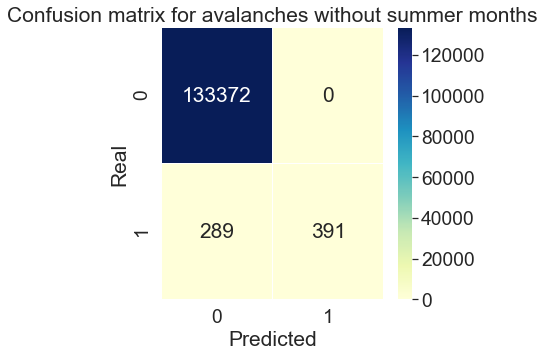

In [54]:
cf_matrix_win = confusion_matrix(test_labels_win, label_pred_win)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cf_matrix_win, annot=True, ax=ax, cmap="YlGnBu", fmt=".0f", linewidths=.5)
plt.title("Confusion matrix for avalanches without summer months")
plt.xlabel('Predicted')
plt.ylabel('Real');

In [55]:
# displaying report of performance of model
print(classification_report(test_labels_win, label_pred_win, digits=3))

              precision    recall  f1-score   support

           0      0.998     1.000     0.999    133372
           1      1.000     0.575     0.730       680

    accuracy                          0.998    134052
   macro avg      0.999     0.787     0.865    134052
weighted avg      0.998     0.998     0.998    134052



In [56]:
# summarize performance of the model
print('Mean ROC AUC: %.5f' % mean(scores))
print("Accuracy:",round(metrics.accuracy_score(test_labels_win, label_pred_win),5))
print("F1_score weighted:", round(f1_score(test_labels_win, label_pred_win, average='weighted'),5))

Mean ROC AUC: 0.99477
Accuracy: 0.99784
F1_score weighted: 0.99755


## Results for altitude from 1500 to 3600 metres

In [57]:
df.elevation.value_counts()

1800.0    74473
1500.0    74473
2100.0    74473
2400.0    71238
3000.0    64766
2700.0    64766
3300.0    51823
3600.0    29164
3900.0    19458
4200.0     9708
4800.0     3238
4500.0     3238
Name: elevation, dtype: int64

In [58]:
df_elevation = df.drop(columns=["massif_num","lon","lat","aval_type", "acccidental_risk_index", 
                            'snow_thickness_1D', 'snow_thickness_3D', 'snow_thickness_5D',
                           'snow_water_1D', 'snow_water_3D', 'snow_water_5D', 'risk_index',
                           'thickness_of_wet_snow_top_of_snowpack','thickness_of_frozen_snow_top_of_snowpack',
                           'surface_air_pressure_mean', 'rainfall_rate', 'drainage', 'runoff',
                           'liquid_water_in_soil', 'frozen_water_in_soil', 'snow_melting_rate', 'aval_accident'])

In [59]:
# creating initial dataframe
df_massifs = pd.DataFrame(massifs, columns=['massif_name'])

# generate binary values using get_dummies
dum_df = pd.get_dummies(df_massifs, columns=["massif_name"], prefix="massif")

# merge initial dataframe with dummies
df_massifs = df_massifs.join(dum_df)

# merge final datatset with dataframe with dummies
df_elevation = df_elevation.merge(df_massifs, how="left", on="massif_name")

In [60]:
# getting rid of redundant variable
df_elevation = df_elevation.drop(columns=['massif_name'])

In [61]:
# creating variable for months
df_elevation["month"] = (df_elevation.day.str[5:7]).astype(int)
df_elevation = df_elevation.drop(columns=['day'])

In [62]:
# verifying there are no null values in dataset
(df_elevation.apply(lambda x: x.isnull().sum())).sum()

0

In [63]:
# reducing altitudes where avalanches rarely occur
df_elevation = df_elevation[(df_elevation["elevation"]>1499) & (df_elevation["elevation"]< 3601)]

In [64]:
# last check of dataframe before using RF model
df_elevation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 505176 entries, 0 to 540817
Data columns (total 45 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   elevation                           505176 non-null  float64
 1   temp_soil_0.005_m                   505176 non-null  float64
 2   temp_soil_0.08_m                    505176 non-null  float64
 3   whiteness_albedo                    505176 non-null  float64
 4   net_radiation                       505176 non-null  float64
 5   surface_temperature                 505176 non-null  float64
 6   surface_snow_amount                 505176 non-null  float64
 7   thickness_of_snowfall               505176 non-null  float64
 8   snow_thickness_7D                   505176 non-null  float64
 9   snow_water_7D                       505176 non-null  float64
 10  penetration_ram_resistance          505176 non-null  float64
 11  near_surface_humidity_mean

In [65]:
# labels are the values we want to predict
labels_el = np.array(df_elevation['aval_event'])

# removing the labels from the features
features_el = df_elevation.drop(columns=['aval_event'])

# saving feature names for later use
feature_list_el = list(features_el.columns)

# converting to numpy array
features_el = np.array(features_el)

In [66]:
# splitting dataset into train and test
train_features_el, test_features_el, train_labels_el, test_labels_el = train_test_split(features_el, labels_el, test_size = 0.33, random_state = 42)

In [67]:
# displaying sizes of train/test features and labels
print('Training Features Shape:', train_features_el.shape)
print('Training Labels Shape:', train_labels_el.shape)
print('Testing Features Shape:', test_features_el.shape)
print('Testing Labels Shape:', test_labels_el.shape)

Training Features Shape: (338467, 44)
Training Labels Shape: (338467,)
Testing Features Shape: (166709, 44)
Testing Labels Shape: (166709,)


In [68]:
%%time

# evaluate model
scores = cross_val_score(rfc_under_sub, features_el, labels_el, scoring='roc_auc', cv=cv, n_jobs=-1)

Wall time: 22min


In [69]:
%%time
# fitting the model and prediction
rfc_under_sub.fit(train_features_el, train_labels_el)

label_pred_el = rfc_under_sub.predict(test_features_el)

Wall time: 4min 52s


In [70]:
# displaying report of performance of model
print(classification_report(test_labels_el, label_pred_el, digits=3))

              precision    recall  f1-score   support

           0      0.998     1.000     0.999    166101
           1      1.000     0.567     0.724       608

    accuracy                          0.998    166709
   macro avg      0.999     0.784     0.862    166709
weighted avg      0.998     0.998     0.998    166709



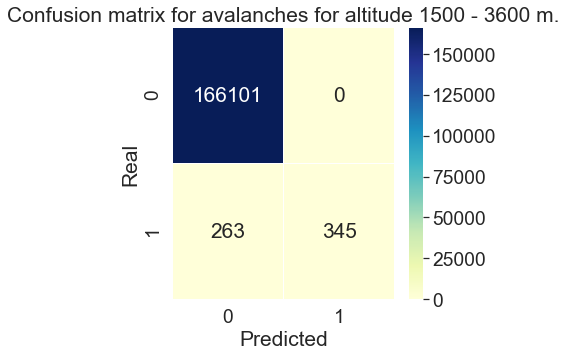

In [71]:
cf_matrix_el = confusion_matrix(test_labels_el, label_pred_el)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cf_matrix_el, annot=True, ax=ax, cmap="YlGnBu", fmt=".0f", linewidths=.5)
plt.title("Confusion matrix for avalanches for altitude 1500 - 3600 m.")
plt.xlabel('Predicted')
plt.ylabel('Real');

In [72]:
# summarize performance of the model
print('Mean ROC AUC: %.5f' % mean(scores))
print("Accuracy:",round(metrics.accuracy_score(test_labels_el, label_pred_el),5))
print("F1_score weighted:", round(f1_score(test_labels_el, label_pred_el, average='weighted'),5))

Mean ROC AUC: 0.99280
Accuracy: 0.99842
F1_score weighted: 0.99821


## Results for limited altitude and without summer

In [73]:
# creating new dataframe for altitude from 1500 to 3600 and with exclusion of summer months
df_elev_win = df_elevation[~df_elevation["month"].isin(summer_season)]

In [74]:
# labels are the values we want to predict
labels_el_w = np.array(df_elev_win['aval_event'])

# removing the labels from the features
features_el_w = df_elev_win.drop(columns=['aval_event'])

# saving feature names for later use
feature_list_el_w = list(features_el_w.columns)

# converting to numpy array
features_el_w = np.array(features_el_w)

In [75]:
# splitting dataset into train and test
train_features_el_w, test_features_el_w, train_labels_el_w, test_labels_el_w = train_test_split(features_el_w, labels_el_w, test_size = 0.33, random_state = 42)

In [76]:
# displaying sizes of train/test features and labels
print('Training Features Shape:', train_features_el_w.shape)
print('Training Labels Shape:', train_labels_el_w.shape)
print('Testing Features Shape:', test_features_el_w.shape)
print('Testing Labels Shape:', test_labels_el_w.shape)

Training Features Shape: (254224, 44)
Training Labels Shape: (254224,)
Testing Features Shape: (125216, 44)
Testing Labels Shape: (125216,)


In [77]:
%%time

# evaluate model
scores = cross_val_score(rfc_under_sub, features_el_w, labels_el_w, scoring='roc_auc', cv=cv, n_jobs=-1)

Wall time: 19min 40s


In [78]:
%%time
# fitting the model and prediction
rfc_under_sub.fit(train_features_el_w, train_labels_el_w)

label_pred_el_w = rfc_under_sub.predict(test_features_el_w)

Wall time: 4min 1s


In [79]:
# displaying report of performance of model
print(classification_report(test_labels_el_w, label_pred_el_w, digits=3))

              precision    recall  f1-score   support

           0      0.998     1.000     0.999    124616
           1      1.000     0.522     0.686       600

    accuracy                          0.998    125216
   macro avg      0.999     0.761     0.842    125216
weighted avg      0.998     0.998     0.997    125216



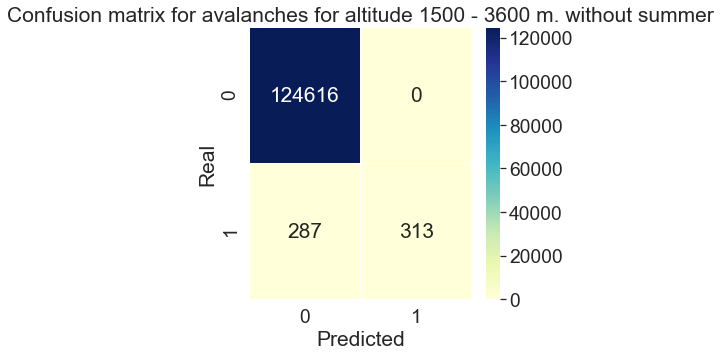

In [80]:
cf_matrix_el_w = confusion_matrix(test_labels_el_w, label_pred_el_w)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cf_matrix_el_w, annot=True, ax=ax, cmap="YlGnBu", fmt=".0f", linewidths=.5)
plt.title("Confusion matrix for avalanches for altitude 1500 - 3600 m. without summer")
plt.xlabel('Predicted')
plt.ylabel('Real');

In [81]:
# summarize performance of the model
print('Mean ROC AUC: %.5f' % mean(scores))
print("Accuracy:",round(metrics.accuracy_score(test_labels_el_w, label_pred_el_w),5))
print("F1_score weighted:", round(f1_score(test_labels_el_w, label_pred_el_w, average='weighted'),5))

Mean ROC AUC: 0.99490
Accuracy: 0.99771
F1_score weighted: 0.99735


## Results for French Alps (without massifs)

In [82]:
df_clean.columns

Index(['temp_soil_0.005_m', 'temp_soil_0.08_m', 'whiteness_albedo',
       'net_radiation', 'surface_temperature', 'surface_snow_amount',
       'thickness_of_snowfall', 'snow_thickness_7D', 'snow_water_7D',
       'penetration_ram_resistance', 'near_surface_humidity_mean',
       'relative_humidity_mean', 'freezing_level_altitude_mean',
       'rain_snow_transition_altitude_mean', 'air_temp_max', 'wind_speed_max',
       'snowfall_rate_max', 'nebulosity_max', 'air_temp_min', 'aval_event',
       'massif_Aravis', 'massif_Bauges', 'massif_Beaufortin',
       'massif_Belledonne', 'massif_Chablais', 'massif_Champsaur',
       'massif_Chartreuse', 'massif_Devoluy', 'massif_Gdes-rouss',
       'massif_Ht_Var-Ver', 'massif_Hte-maurie', 'massif_Hte-tarent',
       'massif_Maurienne', 'massif_Mercantour', 'massif_Mont-Blanc',
       'massif_Oisans', 'massif_Parpaillon', 'massif_Pelvoux',
       'massif_Queyras', 'massif_Thabor', 'massif_Ubaye', 'massif_Vanoise',
       'massif_Vercors', 'month

In [83]:
# removing variables with massifs
df_no_massifs = df_clean[['temp_soil_0.005_m', 'temp_soil_0.08_m', 'whiteness_albedo',
       'net_radiation', 'surface_temperature', 'surface_snow_amount',
       'thickness_of_snowfall', 'snow_thickness_7D', 'snow_water_7D',
       'penetration_ram_resistance', 'near_surface_humidity_mean',
       'relative_humidity_mean', 'freezing_level_altitude_mean',
       'rain_snow_transition_altitude_mean', 'air_temp_max', 'wind_speed_max',
       'snowfall_rate_max', 'nebulosity_max', 'air_temp_min', 'aval_event', 'month']]

In [84]:
# checking new dataframe
df_no_massifs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540818 entries, 0 to 540817
Data columns (total 21 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   temp_soil_0.005_m                   540818 non-null  float64
 1   temp_soil_0.08_m                    540818 non-null  float64
 2   whiteness_albedo                    540818 non-null  float64
 3   net_radiation                       540818 non-null  float64
 4   surface_temperature                 540818 non-null  float64
 5   surface_snow_amount                 540818 non-null  float64
 6   thickness_of_snowfall               540818 non-null  float64
 7   snow_thickness_7D                   540818 non-null  float64
 8   snow_water_7D                       540818 non-null  float64
 9   penetration_ram_resistance          540818 non-null  float64
 10  near_surface_humidity_mean          540818 non-null  float64
 11  relative_humidity_mean    

In [85]:
# labels are the values we want to predict
labels_alps = np.array(df_no_massifs['aval_event'])

# removing the labels from the features
features_alps = df_no_massifs.drop(columns=['aval_event'])

# saving feature names for later use
feature_list_alps = list(features_alps.columns)

# converting to numpy array
features_alps = np.array(features_alps)

In [86]:
# splitting dataset into train and test
train_features_alps, test_features_alps, train_labels_alps, test_labels_alps = train_test_split(features_alps, labels_alps, test_size = 0.33, random_state = 42)

In [87]:
# displaying sizes of train/test features and labels
print('Training Features Shape:', train_features_alps.shape)
print('Training Labels Shape:', train_labels_alps.shape)
print('Testing Features Shape:', test_features_alps.shape)
print('Testing Labels Shape:', test_labels_alps.shape)

Training Features Shape: (362348, 20)
Training Labels Shape: (362348,)
Testing Features Shape: (178470, 20)
Testing Labels Shape: (178470,)


In [88]:
%%time

# evaluate model
scores = cross_val_score(rfc_under_sub, features_alps, labels_alps, scoring='roc_auc', cv=cv, n_jobs=-1)

Wall time: 25min 5s


In [89]:
%%time
# fitting the model and prediction
rfc_under_sub.fit(train_features_alps, train_labels_alps)

label_pred_alps = rfc_under_sub.predict(test_features_alps)

Wall time: 2min 14s


In [90]:
# displaying report of performance of model
print(classification_report(test_labels_alps, label_pred_alps, digits=3))

              precision    recall  f1-score   support

           0      0.998     1.000     0.999    177760
           1      0.992     0.528     0.689       710

    accuracy                          0.998    178470
   macro avg      0.995     0.764     0.844    178470
weighted avg      0.998     0.998     0.998    178470



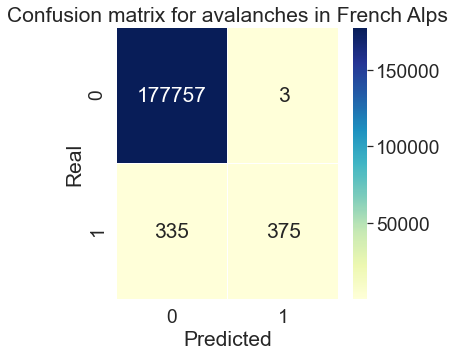

In [91]:
cf_matrix_alps = confusion_matrix(test_labels_alps, label_pred_alps)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cf_matrix_alps, annot=True, ax=ax, cmap="YlGnBu", fmt=".0f", linewidths=.5)
plt.title("Confusion matrix for avalanches in French Alps")
plt.xlabel('Predicted')
plt.ylabel('Real');

In [92]:
# summarize performance of the model
print('Mean ROC AUC: %.5f' % mean(scores))
print("Accuracy:",round(metrics.accuracy_score(test_labels_alps, label_pred_alps),5))
print("F1_score weighted:", round(f1_score(test_labels_alps, label_pred_alps, average='weighted'),5))

Mean ROC AUC: 0.98296
Accuracy: 0.99811
F1_score weighted: 0.99782


## Results for French Alps without summer

In [93]:
df_alps_win = df_no_massifs[~df_no_massifs["month"].isin(summer_season)]

In [94]:
# labels are the values we want to predict
labels_alps_win = np.array(df_alps_win['aval_event'])

# removing the labels from the features
features_alps_win = df_alps_win.drop(columns=['aval_event'])

# saving feature names for later use
feature_list_alps_win = list(features_alps_win.columns)

# converting to numpy array
features_alps_win = np.array(features_alps_win)

In [95]:
# splitting dataset into train and test
train_features_alps_win, test_features_alps_win, train_labels_alps_win, test_labels_alps_win = train_test_split(features_alps_win, labels_alps_win, test_size = 0.33, random_state = 42)

In [96]:
# displaying sizes of train/test features and labels
print('Training Features Shape:', train_features_alps_win.shape)
print('Training Labels Shape:', train_labels_alps_win.shape)
print('Testing Features Shape:', test_features_alps_win.shape)
print('Testing Labels Shape:', test_labels_alps_win.shape)

Training Features Shape: (272164, 20)
Training Labels Shape: (272164,)
Testing Features Shape: (134052, 20)
Testing Labels Shape: (134052,)


In [97]:
%%time

# evaluate model
scores = cross_val_score(rfc_under_sub, features_alps_win, labels_alps_win, scoring='roc_auc', cv=cv, n_jobs=-1)

Wall time: 19min 49s


In [98]:
%%time
# fitting the model and prediction
rfc_under_sub.fit(train_features_alps_win, train_labels_alps_win)

label_pred_alps_win = rfc_under_sub.predict(test_features_alps_win)

Wall time: 1min 44s


In [99]:
# displaying report of performance of model
print(classification_report(test_labels_alps_win, label_pred_alps_win, digits=3))

              precision    recall  f1-score   support

           0      0.998     1.000     0.999    133372
           1      0.992     0.559     0.715       680

    accuracy                          0.998    134052
   macro avg      0.995     0.779     0.857    134052
weighted avg      0.998     0.998     0.997    134052



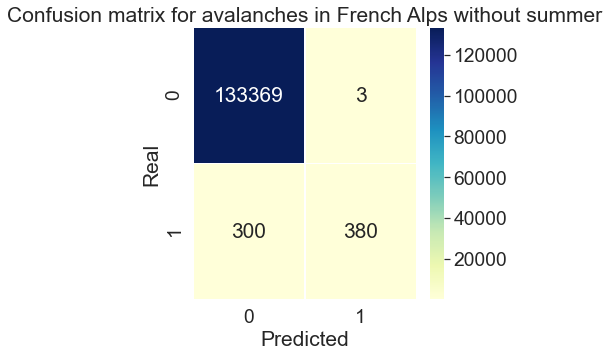

In [100]:
cf_matrix_alps_win = confusion_matrix(test_labels_alps_win, label_pred_alps_win)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cf_matrix_alps_win, annot=True, ax=ax, cmap="YlGnBu", fmt=".0f", linewidths=.5)
plt.title("Confusion matrix for avalanches in French Alps without summer")
plt.xlabel('Predicted')
plt.ylabel('Real');

In [101]:
# summarize performance of the model
print('Mean ROC AUC: %.5f' % mean(scores))
print("Accuracy:",round(metrics.accuracy_score(test_labels_alps_win, label_pred_alps_win),5))
print("F1_score weighted:", round(f1_score(test_labels_alps_win, label_pred_alps_win, average='weighted'),5))

Mean ROC AUC: 0.98604
Accuracy: 0.99774
F1_score weighted: 0.99743


## Balanced RF classifier model

In [102]:
!pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\kamil\anaconda3\lib\site-packages (0.7.0)


In [103]:
from imblearn.ensemble import BalancedRandomForestClassifier
bal_rfc = BalancedRandomForestClassifier(n_estimators=100)

In [104]:
%%time
# evaluating model
scores = cross_val_score(bal_rfc, features_ev, labels_ev, scoring='roc_auc', cv=cv, n_jobs=-1)

Wall time: 3min 21s


In [105]:
%%time
# fitting the model and prediction
bal_rfc.fit(train_features_ev, train_labels_ev)

label_pred_ev =bal_rfc.predict(test_features_ev)

Wall time: 13.4 s


In [106]:
# displaying report of performance of model
print(classification_report(test_labels_ev, label_pred_ev))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94    177760
           1       0.03      0.91      0.06       710

    accuracy                           0.89    178470
   macro avg       0.52      0.90      0.50    178470
weighted avg       1.00      0.89      0.94    178470



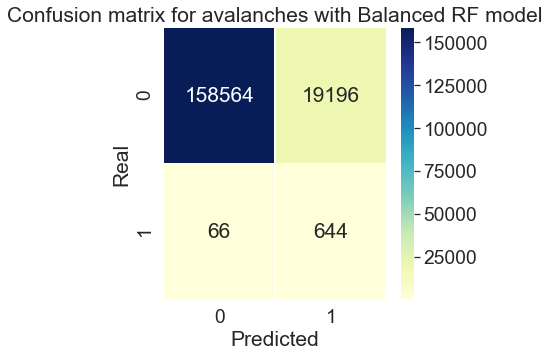

In [107]:
cf_matrix_bal_rfc = confusion_matrix(test_labels_ev, label_pred_ev)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cf_matrix_bal_rfc, annot=True, ax=ax, cmap="YlGnBu", fmt=".0f", linewidths=.5)
plt.title("Confusion matrix for avalanches with Balanced RF model")
plt.xlabel('Predicted')
plt.ylabel('Real');

In [108]:
# summarize performance of the model
print('Mean ROC AUC: %.5f' % mean(scores))
print("Accuracy:",round(metrics.accuracy_score(test_labels_ev, label_pred_ev),5))
print("F1_score weighted:", round(f1_score(test_labels_ev, label_pred_ev, average='weighted'),5))

Mean ROC AUC: 0.98355
Accuracy: 0.89207
F1_score weighted: 0.93924


## Summary of Random Forest results:

Recall for days with avalanche (in order to reduce number of false negatives) was my primary metrics to evaluate performance of avalanche prediction, with weighted F1 score following closely behind. I used 3 different techniques to tackle problem of highly imbalanced data:

- 1) **RF model trained on undersample, used on normal sample**: Result was tiny improvement in recall for avalanche days from 0.546 (model trained on normal sample) to 0.548. Both RF model had weighted F1 score 0.998.

- 2) **Feature selection**: I used 3 different changes to features: A) sample without summer months B) sample with limited altitude (not more than 3600 metres) and C) sample without massif division. Also I checked combinations of A+B and A+C. All the models generated similar F1 scores 0.997–0.998, but the best in recall was option A. **Sample without summer months had 0.58 recall for avalanche days, therefore would be the most prefered option**.

- 3) **Balanced RF model**: This machine learning model did provide the best recall 0.91 for avalanche days, but its F1 score dropped to 0.939 and precision for avalanche days was tragic 0.03 (all previously mentioned models had precision 1 or close to 1). Also this model uses in some sense similar method as undersampling, only on each bootstrap, therefore its performance in real word would be questionable. It means that same objections we had with vanilla undersampling 50 % : 50 % holds true also for balanced RF model.

**Conclusion: I would choose RF model on sample without summer months, because it has second best recall for avalanche days 0.58 and acceptable F1 score.** Balanced RF model with the best recall 0.91 was not selected because of its lower F1 score, terrible precision and very likely problems when applying in real world.